In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import torch
import seaborn as sns



In [2]:
#checking the test and train directory
data_dir = r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_training"
test_dir=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing"


In [ ]:
#load all the files of the data
folder_1=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\Apatosaur Aphie's Apples"
folder_2=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\Bluplocephalus Bob's Blueberries"
folder_3=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\Grapthorina Greta's Grapes"
folder_4=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\Cherizinoasaur Cher's Cherries"
folder_5=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\Corythosaurus Cory's Corn"
folder_6=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\Pachycephalosaurus Perry's Peaches"
folder_7=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\Pepteranodon Pep's Peppers"
floder_8=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\Potoceratops Pott's Potatoes"
folder_9=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\Rhaspdodon Ribery's Raspberries"
folder_10=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\Stribecosaurus Stan's Strawberries"
folder_11=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\Thyreosaur Tim's Thyme"
folder_12=r"C:\Users\mahek\mahek\.ipynb_checkpoints\A,B,CNNS_with_Tim\A,B,CNNS_with_Tim\veggie_heap_testing\vacation_photos"


In [ ]:
#data ugmentation now start 


In [3]:
#normalizing
batch_size=32
img_height=256
img_width=256
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 9835 files belonging to 12 classes.
Using 7868 files for training.


In [4]:
#taking some files for validation
batch_size=32
img_height=256
img_width=256
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 9835 files belonging to 12 classes.
Using 1967 files for validation.


In [5]:
#dealing with the test data
batch_size=32
img_height=256
img_width=256
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2424 files belonging to 12 classes.
Using 484 files for validation.


In [6]:
class_names=train_ds.class_names
print(class_names)

["Apatosaur Aphie's Apples", "Bluplocephalus Bob's Blueberries", "Cherizinoasaur Cher's Cherries", "Corythosaurus Cory's Corn", "Grapthorina Greta's Grapes", "Pachycephalosaurus Perry's Peaches", "Pepteranodon Pep's Peppers", "Potoceratops Pott's Potatoes", "Rhaspdodon Ribery's Raspberries", "Stribecosaurus Stan's Strawberries", "Thyreosaur Tim's Thyme", 'vacation_photos']


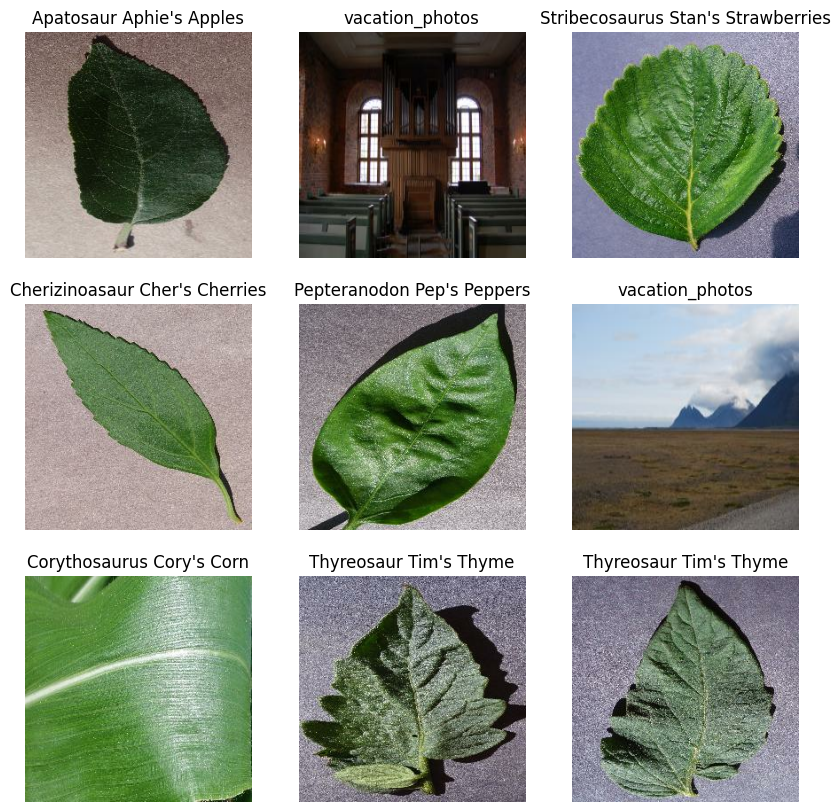

In [7]:
#this is just to visuzlize the data
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [8]:
#getting batches of images
for image_batch,label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break



(32, 256, 256, 3)
(32,)


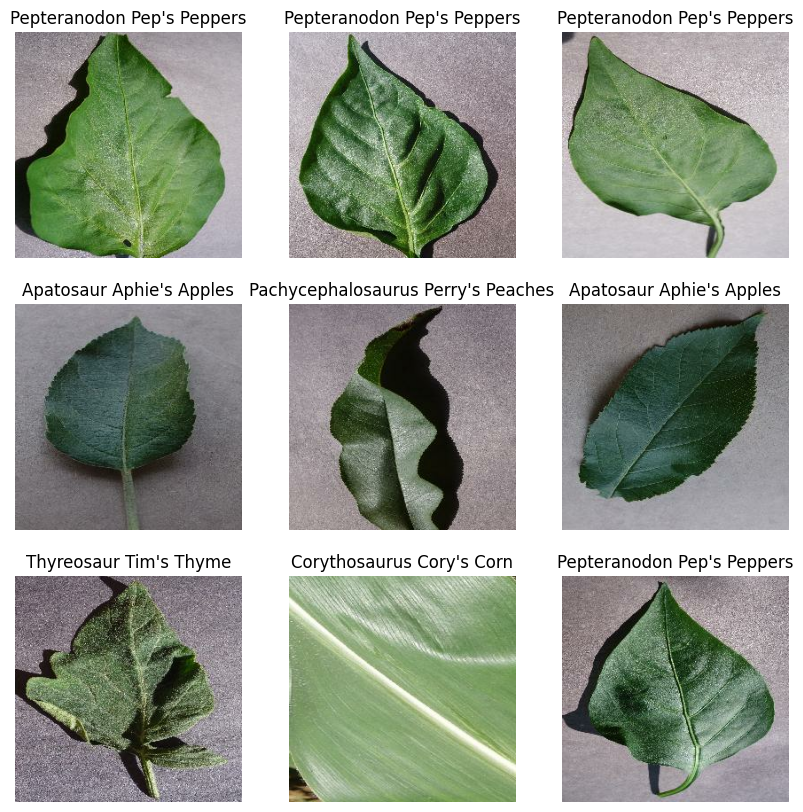

In [9]:
#visualizing these batches of images 
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title(class_names[label_batch[i]])
  plt.axis("off")
plt.show()

the rgb rchannel values are in the range[0,255] range. this is not ideal for a neural network therefore we need to make the input value small. here we will standardize the  values and make it[0,1] range by using tf.keras.util.Rescaling. we need to normalize the data for this we use 

In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [11]:
#alternativer map to do the same
normalized_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch,label_batch=next(iter(normalized_ds))
first_image=image_batch[0]
print(np.min(first_image),np.max(first_image))


0.0 0.9686275


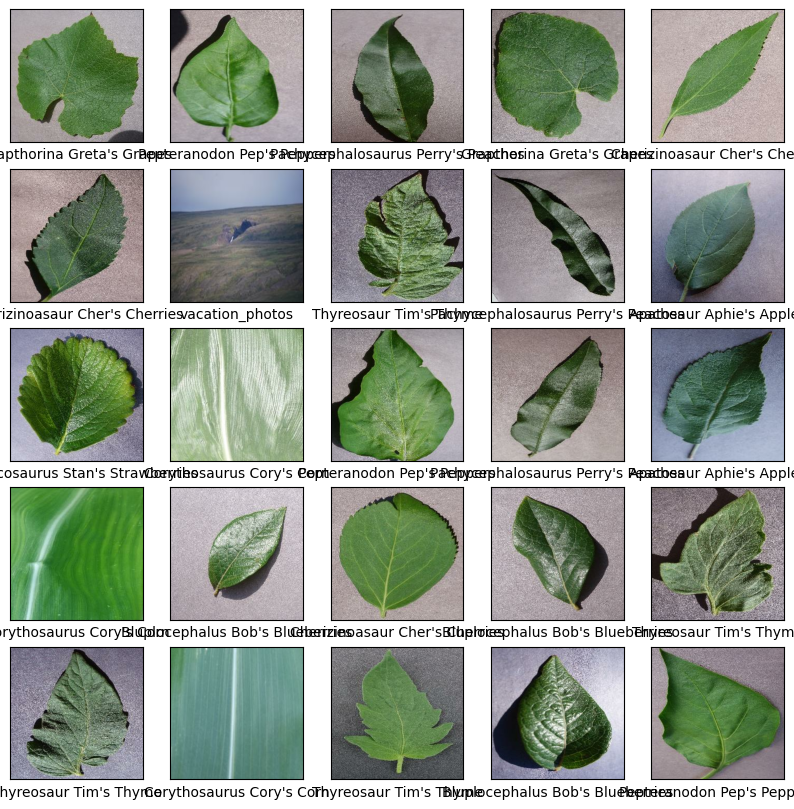

In [12]:
# Visualizing the normalized images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_batch[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[label_batch[i]])
plt.show()


In [13]:
#now we train the model
model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(12,activation='softmax'),
])

we need compile the model now 

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


now we fit the model

In [15]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


C:\Users\mahek\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


246/246 ━━━━━━━━━━━━━━━━━━━━ 594s 2s/step - accuracy: 0.4703 - loss: 1.5979 - val_accuracy: 0.8561 - val_loss: 0.4546
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 702s 3s/step - accuracy: 0.8923 - loss: 0.3451 - val_accuracy: 0.8907 - val_loss: 0.3459
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.9340 - loss: 0.1991 - val_accuracy: 0.9441 - val_loss: 0.1827
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.9696 - loss: 0.0928 - val_accuracy: 0.9344 - val_loss: 0.2119
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 479s 2s/step - accuracy: 0.9673 - loss: 0.0844 - val_accuracy: 0.9481 - val_loss: 0.1703
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 642s 3s/step - accuracy: 0.9861 - loss: 0.0407 - val_accuracy: 0.9568 - val_loss: 0.1651
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1049s 4s/step - accuracy: 0.9882 - loss: 0.0377 - val_accuracy: 0.9548 - val_loss: 0.1770
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 201s 817ms/step - accuracy: 0.9908 - loss: 0.0260 - val_accuracy: 0

In [16]:
loss, accuracy = model.evaluate(test_ds)
print(f"loss = {loss}\nAccuracy = {accuracy*100}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.6881 - loss: 2.3268
loss = 2.379054307937622
Accuracy = 67.76859760284424


In [17]:
y_pred = []
y_true = []

for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    y_pred.extend(predicted_classes)
    y_true.extend(labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


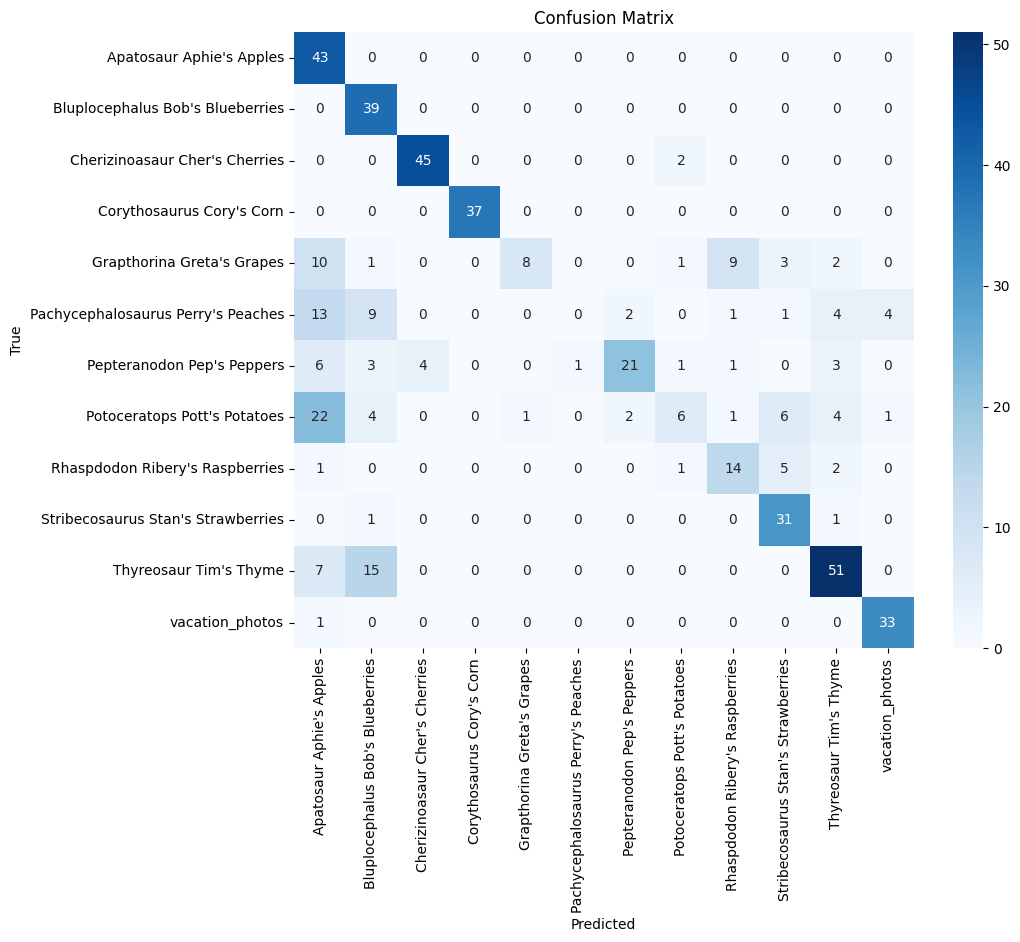

In [18]:
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
print(classification_report(y_true, y_pred, target_names=class_names))

                                    precision    recall  f1-score   support

          Apatosaur Aphie's Apples       0.42      1.00      0.59        43
  Bluplocephalus Bob's Blueberries       0.54      1.00      0.70        39
    Cherizinoasaur Cher's Cherries       0.92      0.96      0.94        47
         Corythosaurus Cory's Corn       1.00      1.00      1.00        37
        Grapthorina Greta's Grapes       0.89      0.24      0.37        34
Pachycephalosaurus Perry's Peaches       0.00      0.00      0.00        34
        Pepteranodon Pep's Peppers       0.84      0.53      0.65        40
      Potoceratops Pott's Potatoes       0.55      0.13      0.21        47
   Rhaspdodon Ribery's Raspberries       0.54      0.61      0.57        23
Stribecosaurus Stan's Strawberries       0.67      0.94      0.78        33
            Thyreosaur Tim's Thyme       0.76      0.70      0.73        73
                   vacation_photos       0.87      0.97      0.92        34

          